<a href="https://colab.research.google.com/github/kaliautkarsh98/dog-breed-identification/blob/master/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! unzip  '/content/gdrive/My Drive/dog-breed-identification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: train/84

In [3]:
from keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=150

In [4]:
df1=pd.read_csv('labels.csv')
df1.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
image_file='/content/train/'

In [6]:
dataset=df1.assign(img_path=lambda x: image_file + x['id'] +'.jpg')
dataset.head()


,id,breed,img_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [7]:
dataset['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

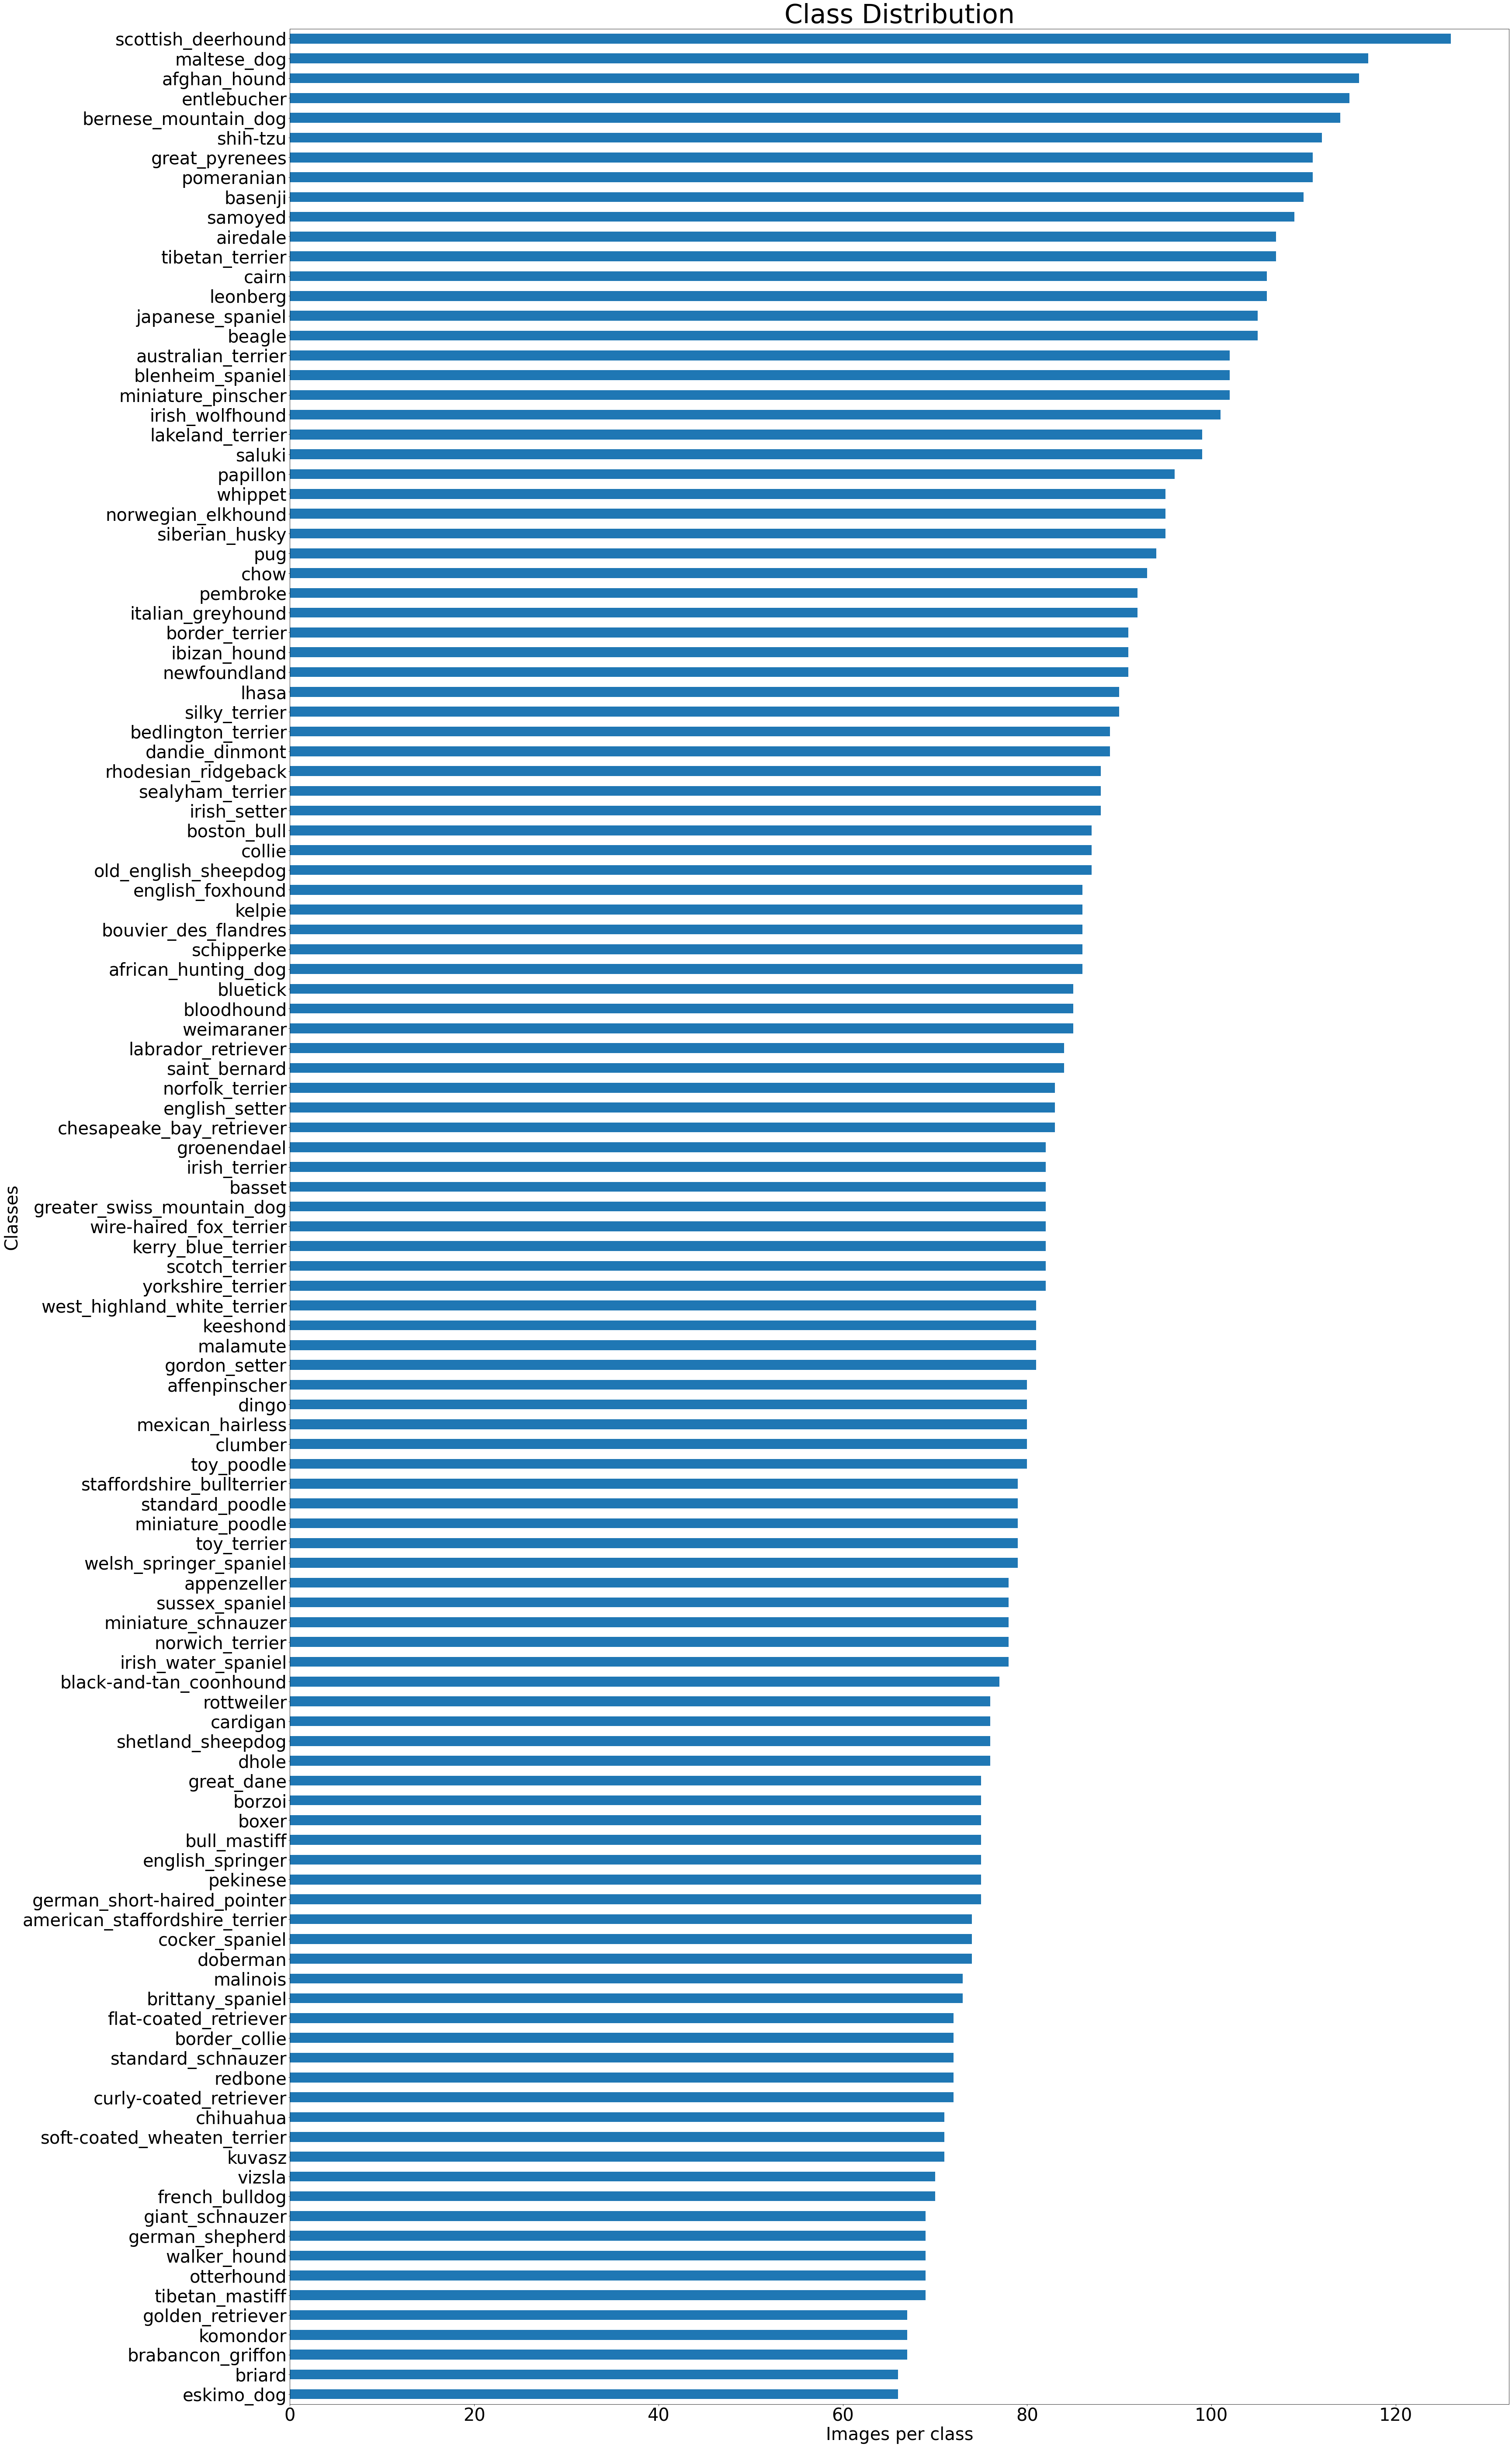

In [8]:
#visualize
ax=pd.value_counts(dataset['breed'],ascending=True).plot(kind='barh',fontsize="40",title="Class Distribution",figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

In [9]:
dataset=dataset.iloc[1:]

In [10]:
dataset["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [11]:
#while processing the entire dataset memory got crashed so I am using top 20 breed animals 
top_20=list(dataset.breed.value_counts()[0:20].index)
top_20

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'cairn',
 'leonberg',
 'japanese_spaniel',
 'beagle',
 'australian_terrier',
 'blenheim_spaniel',
 'miniature_pinscher',
 'irish_wolfhound']

In [12]:
final_dataset=dataset[dataset.breed.isin(top_20)]
final_dataset.shape

(2184, 3)

In [13]:
#loading images and converting them in pixels
img_pixel=np.array([img_to_array(load_img(img, target_size=(299, 299))) for img in final_dataset['img_path'].values.tolist()])
img_pixel.shape

(2184, 299, 299, 3)

In [14]:
#label  encoding step 
image_label=final_dataset['breed']
image_label=pd.get_dummies(final_dataset['breed'])
image_label.head()

,afghan_hound,airedale,australian_terrier,basenji,beagle,bernese_mountain_dog,blenheim_spaniel,cairn,entlebucher,great_pyrenees,irish_wolfhound,japanese_spaniel,leonberg,maltese_dog,miniature_pinscher,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
# dividing the data in x and y
x=img_pixel
y=image_label.values

In [16]:
x.shape

(2184, 299, 299, 3)

In [17]:
y.shape

(2184, 20)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1747, 299, 299, 3)
(1747, 20)
(437, 299, 299, 3)
(437, 20)


In [24]:
#Data preprocessing and augmentation steps 
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
training_set=train_datagen.flow(x_train,y=y_train,batch_size=32)
testing_set=test_datagen.flow(x_test,y=y_test,batch_size=32)

In [26]:
# defining the model 
model=Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(299,299,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='softmax'))
model.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 301, 301, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 301, 301, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 299, 299, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 710432)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [27]:
history=model.fit_generator(training_set,
                       steps_per_epoch = 16,
                       validation_data = testing_set,
                       validation_steps = 4,
                       epochs = 20,
                       verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
16/16 [==============================] - 121s 8s/step - loss: 12.9966 - accuracy: 0.0488 - val_loss: 2.9727 - val_accuracy: 0.0469
Epoch 2/20
16/16 [==============================] - 116s 7s/step - loss: 3.0076 - accuracy: 0.0521 - val_loss: 2.9928 - val_accuracy: 0.0781
Epoch 3/20
16/16 [==============================] - 119s 7s/step - loss: 2.9943 - accuracy: 0.0625 - val_loss: 3.0012 - val_accuracy: 0.0391
Epoch 4/20
16/16 [==============================] - 119s 7s/step - loss: 2.9936 - accuracy: 0.0449 - val_loss: 3.0088 - val_accuracy: 0.0469
Epoch 5/20
16/16 [==============================] - 116s 7s/step - loss: 2.9944 - accuracy: 0.0441 - val_loss: 2.9950 - val_accuracy: 0.0469
Epoch 6/20
16/16 [==============================] - 119s 7s/step - loss: 2.9939 - accuracy: 0.0391 - val_loss: 2.9931 - val_accuracy: 0.0469
Epoch 7/20
16/16 [==============================] - 118s 7s/step - loss: 2.98

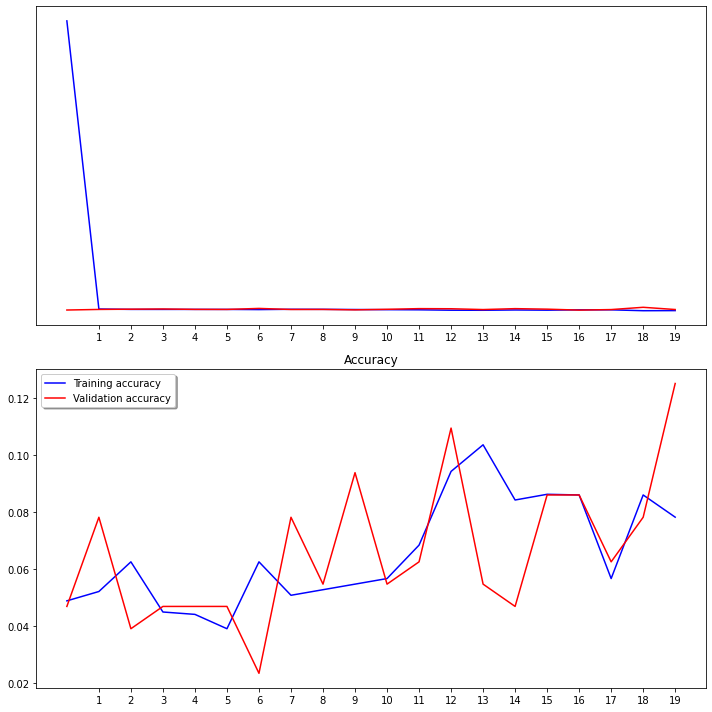

In [28]:
##visualization of training set

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
plt.title('Loss')
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1))

plt.title('Accuracy')
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [30]:
#creating an array of predicted test images
predictions=model.predict(x_test)